In [23]:
import sys
import os
#sys.path.insert(0, os.path.abspath('..\\diffpy'))
import numpy as np
import matplotlib.pyplot as plt
import trajectories as dt

In [18]:
x, y = dt.walk2D()

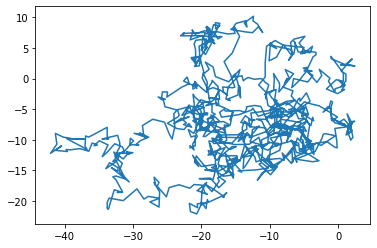

In [19]:
plt.plot(x, y)

In [60]:
steps = x.shape[0]

mx1, mx2 = np.meshgrid(x, x)
my1, my2 = np.meshgrid(y, y)

In [61]:
msds = np.zeros(steps-1)
for i in range(1, steps):
    msds[i-1] = (np.trace((mx1 - mx2)**2, offset=i) + np.trace((my1 - my2)**2, offset=i))/(steps-i)

In [68]:
def trajDistance(x, y):
    return np.cumsum(np.sqrt(np.diff(x)**2 + np.diff(y)**2))

In [ ]:
def trajMSD(x, y):
    steps = x.shape[0]
    mx1, mx2 = np.meshgrid(x, x)
    my1, my2 = np.meshgrid(y, y)
    
    msds = np.zeros(steps-1)
    for i in range(1, steps):
        msds[i-1] = (np.trace((mx1 - mx2)**2, offset=i) + np.trace((my1 - my2)**2, offset=i))/(steps-i)
        
    return msds

In [72]:
def trajsDistance(x, y):
    return np.cumsum(np.sqrt(np.diff(x, axis=0)**2 + np.diff(y, axis=0)**2), axis=0)

In [77]:
x, y = dt.walks2D()

In [75]:
dist = trajsDistance(xs, ys)

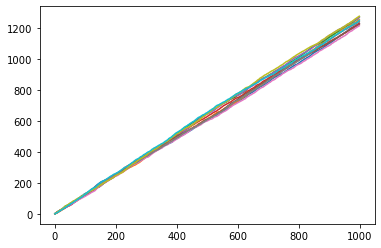

In [76]:
for i in range(10):
    plt.plot(dist[:, i])

In [91]:
steps, N = x.shape
mx1, mx2 = np.zeros((steps, steps, N)), np.zeros((steps, steps, N))
my1, my2 = np.zeros((steps, steps, N)), np.zeros((steps, steps, N))

for i in range(N):
    mx1[:, :, i], mx2[:, :, i] = np.meshgrid(x[:, i], x[:, i])
    my1[:, :, i], my2[:, :, i] = np.meshgrid(y[:, i], y[:, i])

In [112]:
msds = np.zeros((steps-1, N))
for i in range(1, steps):
    msds[i-1, :] = (np.trace((mx1 - mx2)**2, offset=i) + np.trace((my1 - my2)**2, offset=i))/(steps-i)

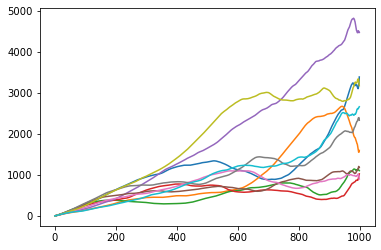

In [113]:
for i in range(10):
    plt.plot(msds[:, i])

In [173]:
def trajsMSD(x, y):
    steps, N = x.shape
    mx1, mx2 = np.zeros((steps, steps, N)), np.zeros((steps, steps, N))
    my1, my2 = np.zeros((steps, steps, N)), np.zeros((steps, steps, N))

    for i in range(N):
        mx1[:, :, i], mx2[:, :, i] = np.meshgrid(x[:, i], x[:, i])
        my1[:, :, i], my2[:, :, i] = np.meshgrid(y[:, i], y[:, i])
        
        
    mmsd = (mx1 - mx2)**2 + (my1 - my2)**2
    mmsddiag = np.ones((steps-1, steps-1, N))*np.nan
    
    mgaus = (mx1 - mx2)**4 + (my1 - my2)**4
    mgausdiag = np.ones((steps-1, steps-1, N))*np.nan

    for i in range(1, steps):
        mmsddiag[i-1, i-1:, :] = np.transpose(np.diagonal(mmsd, offset=i))
        mgausdiag[i-1, i-1:, :] = np.transpose(np.diagonal(mgaus, offset=i))
        
    msds = np.nanmean(mmsddiag, axis=1)
    gauss = 2*np.nanmean(mgausdiag, axis=1)/(3*msds**2) - 1
    
    return msds, gauss

In [ ]:
def trajMSD(x, y):
    steps = x.shape[0]
    x, y = x.reshape((steps, 1)), y.reshape((steps, 1))
    msds, gauss = trajsMSD(x, y)
    return msds, gauss

In [151]:
ix, iy = np.meshgrid(np.linspace(0, steps-1, steps), np.linspace(0, steps-1, steps))

test = (ix - iy)
output = np.zeros((steps-1, steps-1))

for i in range(1, steps):
    output[i-1, i-1:] = np.diagonal(test, offset=i)

In [174]:
mmsd = (mx1 - mx2)**2 + (my1 - my2)**2
mmsddiag = np.ones((steps-1, steps-1, N))*np.nan

for i in range(1, steps):
    mmsddiag[i-1, i-1:, :] = np.transpose(np.diagonal(mmsd, offset=i))

In [166]:
msds = np.nanmean(mmsddiag, axis=1)

(-0.5, 0.5)

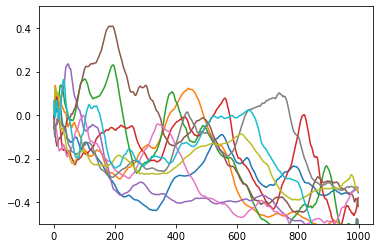

In [177]:
for i in range(10):
    plt.plot(gauss[:, i])
    
plt.ylim([-0.5, 0.5])

In [175]:
msds, gauss = trajsMSD(x, y)